<a href="https://colab.research.google.com/github/RamyCodes/EDA_milestone1/blob/main/EDA_milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [77]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Installing the Kaggle dataset

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d bartoszpieniak/poland-cars-for-sale-dataset

poland-cars-for-sale-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from zipfile import ZipFile
file_name = 'poland-cars-for-sale-dataset.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# Reading the dataset along with basic statistics about it using: head, count, dtypes and describe methods

In [6]:
data = pd.read_csv('/content/Car_sale_ads.csv')

In [7]:
#Print first 5 rows of data
data.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [8]:
data.count()
# Gets the number of values in each column

Index                      208304
Price                      208304
Currency                   208304
Condition                  208304
Vehicle_brand              208304
Vehicle_model              208304
Vehicle_version            138082
Vehicle_generation         147860
Production_year            208304
Mileage_km                 207321
Power_HP                   207661
Displacement_cm3           206338
Fuel_type                  208304
CO2_emissions               94047
Drive                      193228
Transmission               207825
Type                       208304
Doors_number               206817
Colour                     208304
Origin_country             118312
First_owner                 65094
First_registration_date     86445
Offer_publication_date     208304
Offer_location             208304
Features                   208304
dtype: int64

In [9]:
data.dtypes


Index                        int64
Price                        int64
Currency                    object
Condition                   object
Vehicle_brand               object
Vehicle_model               object
Vehicle_version             object
Vehicle_generation          object
Production_year              int64
Mileage_km                 float64
Power_HP                   float64
Displacement_cm3           float64
Fuel_type                   object
CO2_emissions              float64
Drive                       object
Transmission                object
Type                        object
Doors_number               float64
Colour                      object
Origin_country              object
First_owner                 object
First_registration_date     object
Offer_publication_date      object
Offer_location              object
Features                    object
dtype: object

In [10]:
data.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,208304.000000,2.083040e+05,208304.000000,2.073210e+05,207661.000000,206338.000000,9.404700e+04,206817.000000
mean,104151.500000,6.305383e+04,2012.098241,1.502768e+05,151.836281,1882.567147,3.191564e+05,4.637138
std,60132.329574,8.665967e+04,6.998414,2.937447e+06,77.683546,729.609660,7.291396e+07,0.768559
min,0.000000,5.000000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,52075.750000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,104151.500000,3.570000e+04,2013.000000,1.445660e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,156227.250000,7.599000e+04,2017.000000,2.060000e+05,172.000000,1997.000000,1.640000e+02,5.000000
max,208303.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


# Checking the missing values and dropping unecessary columns

In [11]:
missing_data = pd.read_csv('Car_sale_ads.csv' ,na_values=['?'])
missing_data.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [12]:
null_values = data.isnull().sum()
null_values

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

In [13]:
percent_missing = null_values * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Index,Index,0.000000
Price,Price,0.000000
Currency,Currency,0.000000
Condition,Condition,0.000000
Vehicle_brand,Vehicle_brand,0.000000
Vehicle_model,Vehicle_model,0.000000
Vehicle_version,Vehicle_version,33.711307
Vehicle_generation,Vehicle_generation,29.017206
Production_year,Production_year,0.000000
Mileage_km,Mileage_km,0.471906


In [14]:
# Drop the columns where missing values is greater or equal to 30%
df_clean = data.drop(['Vehicle_version', 'Vehicle_generation','CO2_emissions','Origin_country','First_owner','First_registration_date'], axis=1)

# Removing the remaining missing values by using the appropriate imputation technique

In [15]:
null_values = df_clean.isnull().sum()
null_values

Index                         0
Price                         0
Currency                      0
Condition                     0
Vehicle_brand                 0
Vehicle_model                 0
Production_year               0
Mileage_km                  983
Power_HP                    643
Displacement_cm3           1966
Fuel_type                     0
Drive                     15076
Transmission                479
Type                          0
Doors_number               1487
Colour                        0
Offer_publication_date        0
Offer_location                0
Features                      0
dtype: int64

In [16]:
df_clean['Transmission']=df_clean['Transmission'].fillna(df_clean['Transmission'].mode()[0])
df_clean['Drive']=df_clean['Drive'].fillna(df_clean['Drive'].mode()[0])
df_clean['Mileage_km']=df_clean['Mileage_km'].fillna(df_clean['Mileage_km'].mean())
df_clean['Power_HP']=df_clean['Power_HP'].fillna(df_clean['Power_HP'].mean())
df_clean['Displacement_cm3']=df_clean['Displacement_cm3'].fillna(df_clean['Displacement_cm3'].mean())

In [17]:
null_values = df_clean.isnull().sum()
null_values

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                   0
Power_HP                     0
Displacement_cm3             0
Fuel_type                    0
Drive                        0
Transmission                 0
Type                         0
Doors_number              1487
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

In [18]:
unique = df_clean.nunique()
print(unique)

Index                     208304
Price                      14142
Currency                       2
Condition                      2
Vehicle_brand                108
Vehicle_model               1203
Production_year               92
Mileage_km                 52008
Power_HP                     574
Displacement_cm3            1182
Fuel_type                      8
Drive                          5
Transmission                   2
Type                           9
Doors_number                  10
Colour                        14
Offer_publication_date        41
Offer_location             13635
Features                  177211
dtype: int64


# Applying univariate data analysis using countplot on features that contain small number of unique values


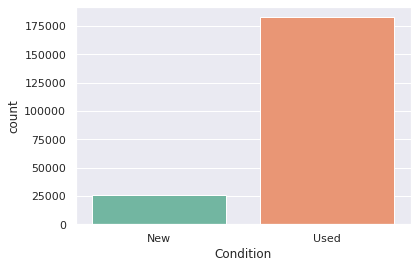

In [19]:
#This plot shows that we are dealing with mostly used cars in our dataset
sns.set(style="darkgrid")
condition_count = sns.countplot(x="Condition", data=df_clean, palette="Set2")

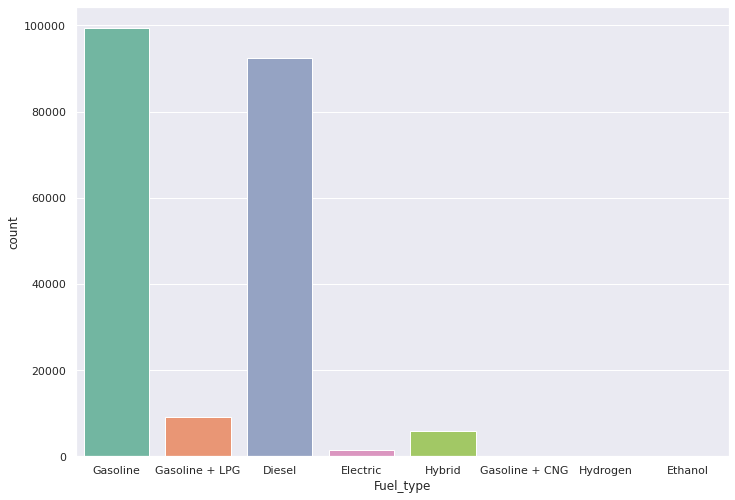

In [20]:
#Most of the fuel_type used by these cars is Gasoline and Disel fuel
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")
Fuel_type_count = sns.countplot(x="Fuel_type", data=df_clean, palette="Set2")

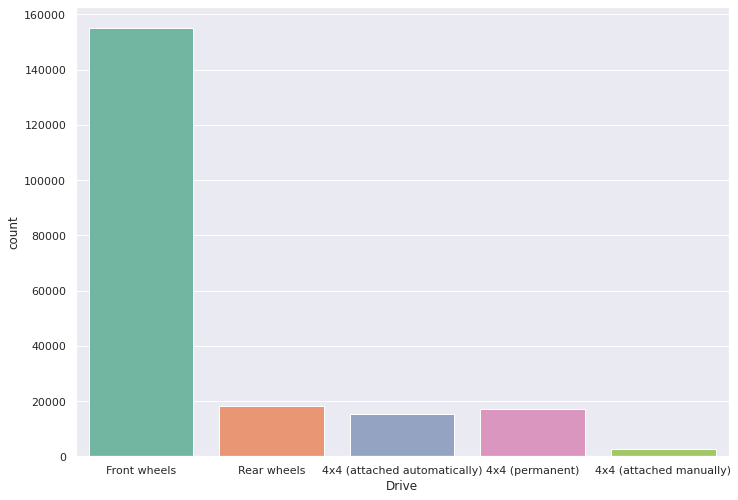

In [21]:
#Most of the cars use Front wheels Drive
sns.set(style="darkgrid")
Drive_count = sns.countplot(x="Drive", data=df_clean, palette="Set2")

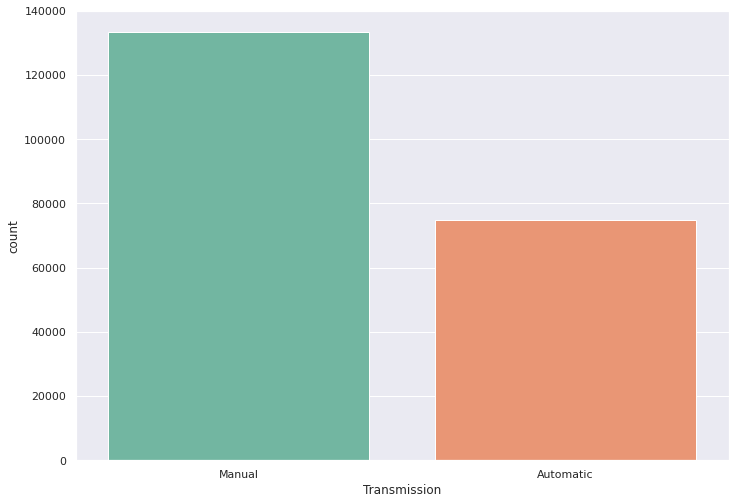

In [22]:
#About half of our cars are manual cars
sns.set(style="darkgrid")
Transmission_count = sns.countplot(x="Transmission", data=df_clean, palette="Set2")

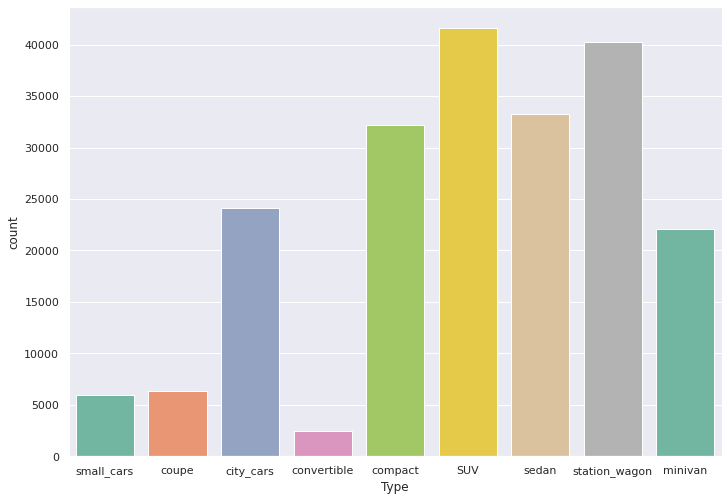

In [23]:
#For the car type, unlike the other features we have here a large variety of car types
sns.set(style="darkgrid")
Type_count = sns.countplot(x="Type", data=df_clean, palette="Set2")

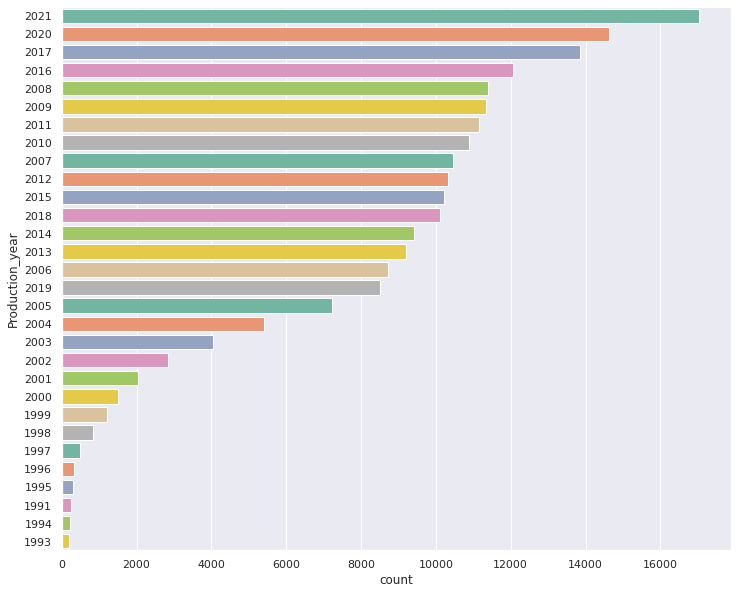

In [24]:
#Most of the cars in our dataset are modern
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
Production_year_count = sns.countplot(y="Production_year", data=df_clean, palette="Set2", order=df_clean['Production_year'].value_counts().index[0:30])

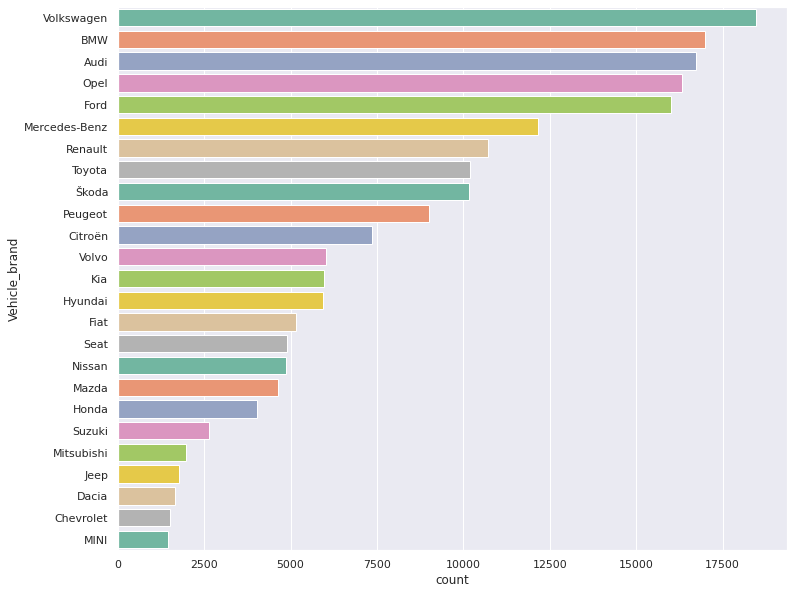

In [25]:
#Here we have a variety of car brand most of which are Volkswagen cars
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
Vehicle_brand_count = sns.countplot(y="Vehicle_brand", data=df_clean, palette="Set2", order=df_clean['Vehicle_brand'].value_counts().index[0:25])

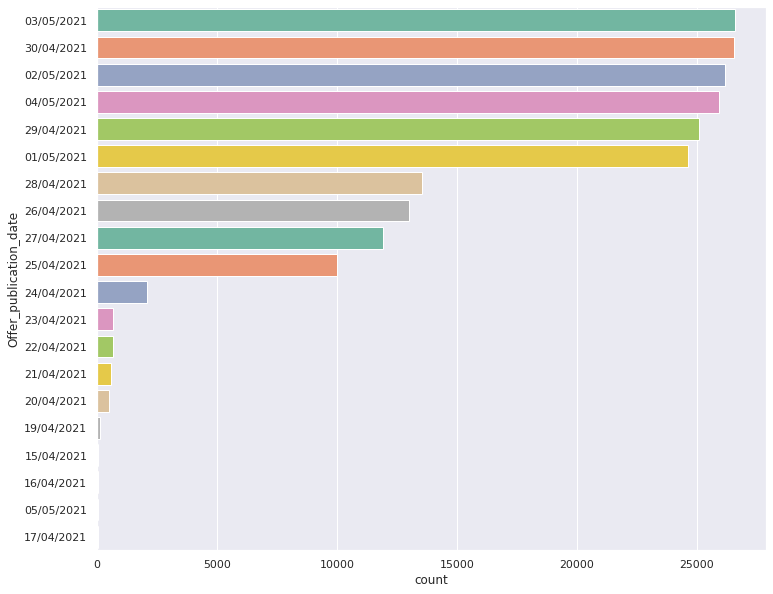

In [26]:
#Since the count after 19/04/2021 is almost 0, we can safely say that all the offer_publication_date are made in the year 2021
#This is later confirmed by looking at the whole column df_clean['Offer_publication_date']
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
Offer_publication_date_count = sns.countplot(y="Offer_publication_date", data=df_clean, palette="Set2", order=df_clean['Offer_publication_date'].value_counts().index[0:20])

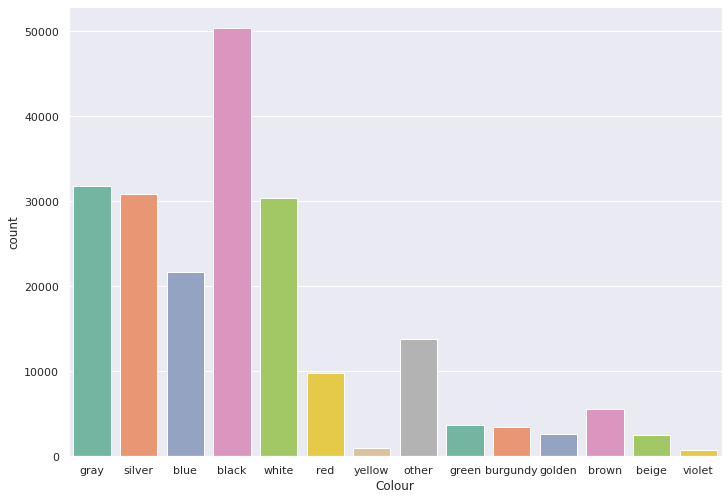

In [27]:
#About half of our cars are manual cars
sns.set(style="darkgrid")
Transmission_count = sns.countplot(x="Colour", data=df_clean, palette="Set2")

# Applying multivariate data analysis on multiple features to study the relation between them

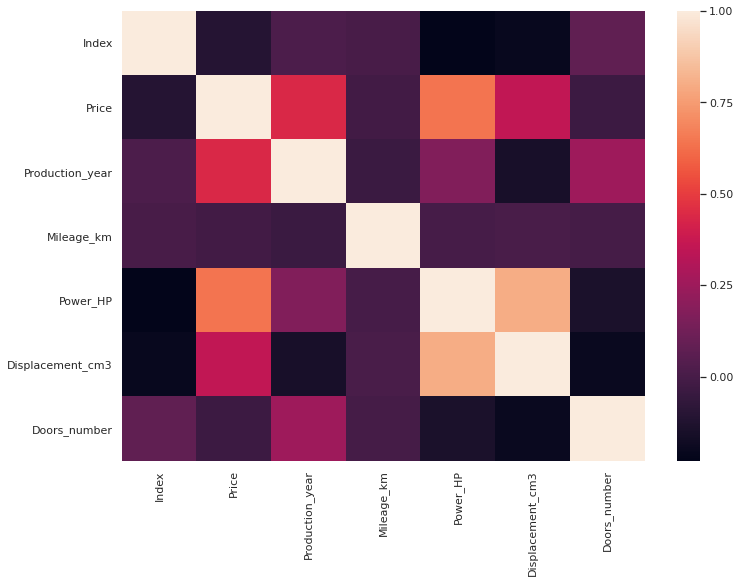

In [28]:
#This heatmap shows a basic overview of how features are corelated to each other
#We can see that Price is influenced by Power_HP, Displacement_cm3 and Production_year
sns.heatmap(df_clean.corr())

In [104]:
#How does the condition of a car determine its price?

#Determining the limits for better plotting
df_clean['Price'].max()
df_clean['Power_HP'].max()
df_clean['Price'].mean()
df_clean['Power_HP'].mean()

151.83628124683983

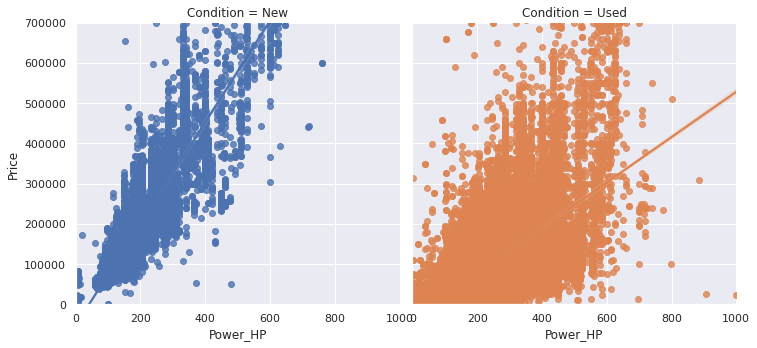

In [95]:
#Plotting the relation between Price, Power_HP and condition of the car
#This plot shows that new cars that has high horse power tends to sell at a larger price than used cars
#However, in this dataset we know that the number of used car is a lot higher than the number of new cars, making the plot in orange seem a lot denser at the bottom 
#Whether or not a car is new, having a large horsepower will always make the car much more expensive
plot = sns.lmplot(x="Power_HP", y="Price", col="Condition", hue="Condition", data=df_clean)
plot.set(xlim=(0, 1000), ylim=(0, 700000))

plt.show()

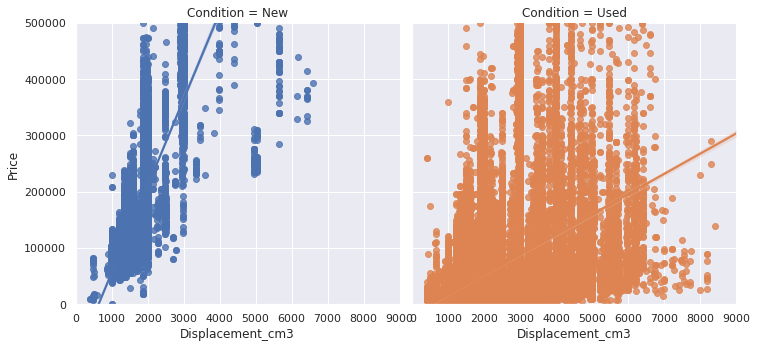

In [109]:
#This plot compares the Price, Displacement_cm3 and the condition of the car
#It yields to the same result about that regardless of the condition of the car, the more Displacement_cm3 you have, the more a car is expensive
#However, here we have more variance in the Displacement_cm3 due to having double the amount of unique values than before(horsepower was 500 values but here 1200)
#making the linear_regression plot fir poorly
plot = sns.lmplot(x="Displacement_cm3", y="Price", col="Condition", hue="Condition", data=df_clean)
plot.set(xlim=(0, 9000), ylim=(0, 500000))

plt.show()

In [110]:
# from the above 2 graphs we can say that the condition of the car in this dataset does not have a strong effect in the determining the price of the car
# we did this by comparing the condition of the car with the 2 most correlated features that determines the price (horsepower and Displacement_cm3)